In [1]:
import pywt
import numpy as np
import matplotlib.pyplot as plt 
import nibabel as nb
import pandas as pd
from skimage.restoration import denoise_wavelet
import scipy.signal as signal
from scipy.signal import butter, lfilter
from scipy.signal import freqs
from scipy.signal import savgol_filter

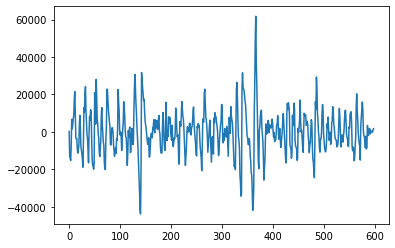

In [2]:

data=pd.read_csv('D:\\medical imaging\\finalprojectdataset\\final_project_subjects_1-3\\watch_01\\_watch_01_1656005742.csv',delimiter='\t')

ppgsignal=data.to_numpy()

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='highpass', analog=False)
    return b, a
def butter_highpass_filter(data,cutoff,fs,order=5):
    b,a=butter_highpass(cutoff,fs,order=order)
    y=signal.filtfilt(b,a,data)
    return y

filterd2=butter_highpass_filter(ppgsignal[:,1],0.3,10,order=5)

# coeff = pywt.wavedec(filterd2, wavelet='db4', level=3)
# print(coeff.size)
plt.plot(filterd2)
plt.show()


c:\Users\marya\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3245: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size


4


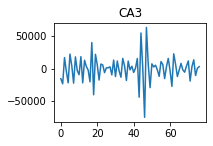

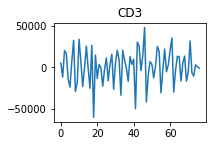

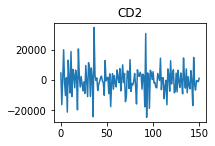

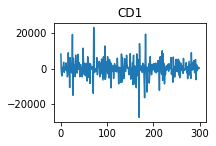

In [3]:
from numpy import size
coeff = pywt.wavedec(filterd2, wavelet='db2', level=3)
print(size(coeff))
plt.subplot(221)
plt.plot(coeff[0])
plt.title('CA3')
plt.show()
plt.subplot(222)
plt.plot(coeff[1])
plt.title('CD3')
plt.show()
plt.subplot(223)
plt.plot(coeff[2])
plt.title('CD2')
plt.show()
plt.subplot(224)
plt.plot(coeff[3])
plt.title('CD1')
plt.show()

-1397.4976885804517
3269.460711093324
-965.6042822466358
352.40120942167505
4


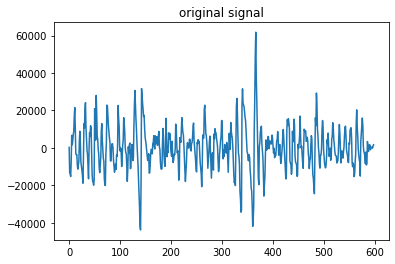

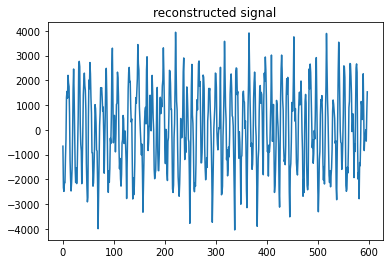

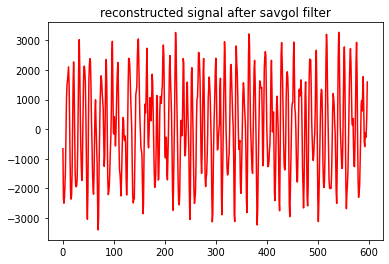

In [5]:
def madev(d, axis=None):
    """ Mean absolute deviation of a signal """
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

coeff = pywt.wavedec(filterd2, wavelet='db2', level=3)
final_y=[]
# final_y.append(coeff[0])
# final_y.append(coeff[1])
####thresholdingOn0-4Coefficients
for k in range(0, 4):
    temp = np.zeros(coeff[k].shape)
    sigma = (1/0.6745) * (np.mean(coeff[k]))
    alphathresh = sigma * np.sqrt(2 * np.log(len(coeff[k])))
    gamaathresh=0.8*alphathresh
    alpha=-(1/gamaathresh)*(np.log2((alphathresh-gamaathresh)/(alphathresh+gamaathresh)))
    print(gamaathresh)
    for i in range(0,len(coeff[k])):
        # print(f'gama={gamaathresh},alpha={alpha}')
        if coeff[k][i]>=-gamaathresh and coeff[k][i]<=(gamaathresh) :
            # print(f'x<thresh= {x[i]}')
            #final_y.append(coeff[1])
            temp[i] = coeff[k][i]
        else:
            coeff[k][i]=(1-np.exp(-alpha*coeff[k][i]))/(1+np.exp(-alpha*coeff[k][i]))*alphathresh
            #coeff[k][i]=0
            # print(f'x>thresh= {x[i]}')
            #final_y.append(coeff[1])
            temp[i] = coeff[k][i]
            # print(coeff[1].shape)
    final_y.append(temp)
print(size(final_y))
plt.plot(filterd2)
plt.title('original signal')
plt.show()
####reconstructingsignalviathresholdedcoeffs
signal=pywt.waverec(final_y,wavelet='db2')
plt.plot(signal)
plt.title('reconstructed signal')
plt.show()
# print(pywt.wavelist(kind='discrete'))

from scipy.signal import savgol_filter
signal2=savgol_filter(signal,5,3)
plt.plot(signal2,color='red')
plt.title('reconstructed signal after savgol filter')
plt.show()

In [12]:
# print(peaks[0].shape)
from scipy.signal import find_peaks
peaks=find_peaks(signal,distance=5)
peaknumber=(peaks[0].shape)
signaltime=len(signal)/10
print(peaknumber[0])
print(signaltime)
bpm= peaknumber[0]/signaltime
print(bpm*60)

75
59.8
75.25083612040135


C:\Users\marya\AppData\Local\Temp\ipykernel_1428\2754087239.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  signal1=np.array(signal).astype(np.float)


598
594


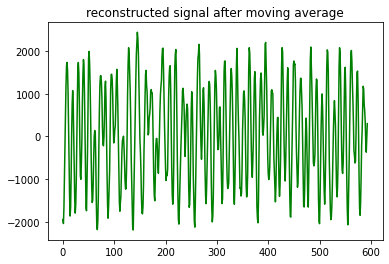

In [6]:
window_size = 5
i = 0
# Initialize an empty list to store moving averages
moving_averages = []
signal1=np.array(signal).astype(np.float)
print(len(signal))
# Loop through the array t o
# consider every window of size 3
while i < len(signal) - window_size + 1:
 
    # Calculate the average of current window
    window_average = np.sum(signal[i:i+window_size])/window_size
     
    # Store the average of current
    # window in moving average list
    moving_averages.append(window_average)
     
    # Shift window to right by one position
    i += 1
   
yd=moving_averages
xd =  np.arange(len(yd))
print(len(yd))
plt.plot(yd, color='g')
plt.title('reconstructed signal after moving average')

plt.show()